## flw_img

In [1]:
from glob import glob

dir_paths = sorted(glob('../../../create_synthe_2023/synthetic_flw/flw/*'))
len(dir_paths)

5

In [2]:
for dir_path in dir_paths:
    img_paths = sorted(glob(f'{dir_path}/*'))
    print(dir_path.split('/')[-1], len(img_paths))

白紫 100000
紫 100000
薄い白緑 100000
薄黄色 100000
黄色丸 100000


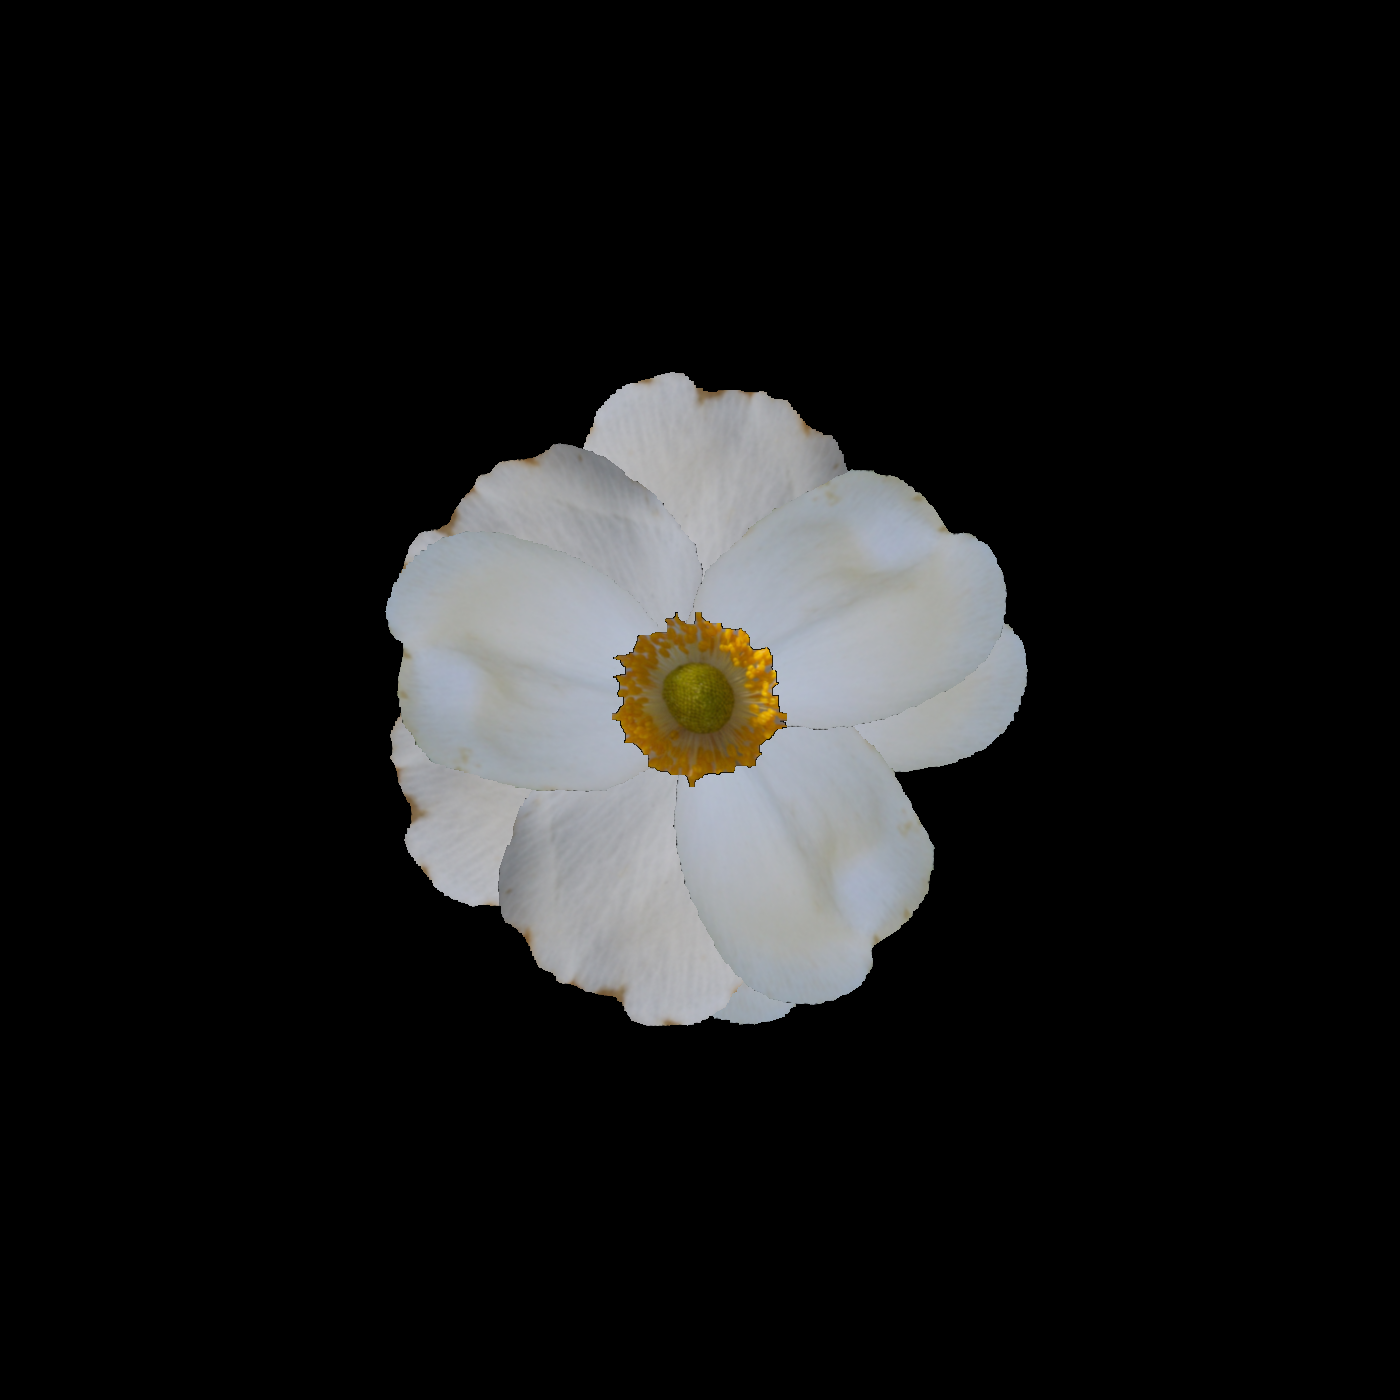

In [3]:
from PIL import Image

Image.open(img_paths[0]).convert("RGB")

## multi-label mask

In [ ]:
from PIL import Image

mask = Image.open(img_paths[0].replace('/flw/', '/mask/')).convert("L")

import numpy as np
import torch

n_classes = 10

mask = np.array(mask)
one_hot = torch.zeros(n_classes, mask.shape[0], mask.shape[1], dtype=torch.float32)
for i in range(n_classes): 
    one_hot[i, :, :] = torch.tensor(mask == i, dtype=torch.float32)

import matplotlib.pyplot as plt
plt.imshow(one_hot[1])
one_hot[1].shape

In [17]:
img.shape

(1400, 1400, 2)

In [ ]:
img_ = np.array([[(i, j) for j in range(one_hot[1].shape[0])] for i in range(one_hot[1].shape[1])])
img_.shape

img_[:, :, 0].mean()

center = [int((one_hot[1] * img_[:, :, 1]).sum() / one_hot[1].sum()), int((one_hot[1] * img_[:, :, 0]).sum() / one_hot[1].sum())]
center

## multi-class mask

In [6]:
dir_paths = sorted(glob('../../../create_synthe_2023/synthetic_flw/mask/*10c'))
for dir_path in dir_paths:
    img_paths = sorted(glob(f'{dir_path}/*'))
    print(dir_path.split('/')[-1], len(img_paths))

白紫_10c 100000
紫_10c 100000
薄い白緑_10c 90891
薄黄色_10c 100000
黄色丸_10c 100000


In [7]:
!pip install -q h5py

In [8]:
from multi_channel_img_io import read_img, write_img
import matplotlib.pyplot as plt

def show(img):
    plt.imshow(img)
    plt.show()

In [9]:
mask_10c = read_img(img_paths[0])
mask_10c.shape

(1400, 1400, 9)

In [10]:
mask_10c = read_img(img_paths[5])
mask_10c.shape

(1400, 1400, 9)

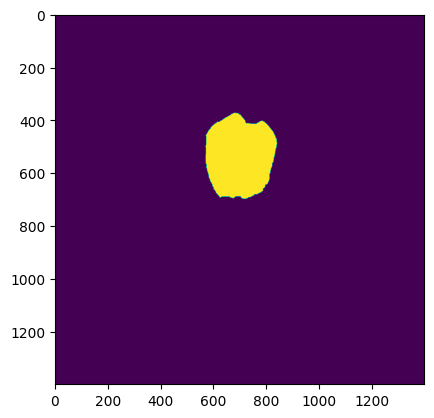

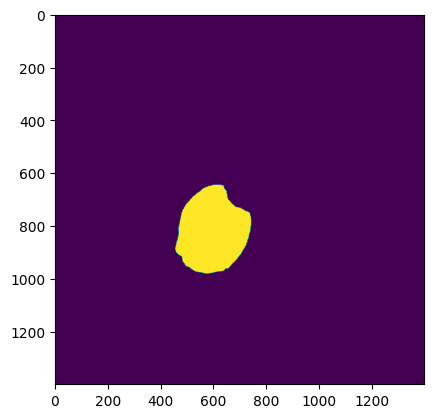

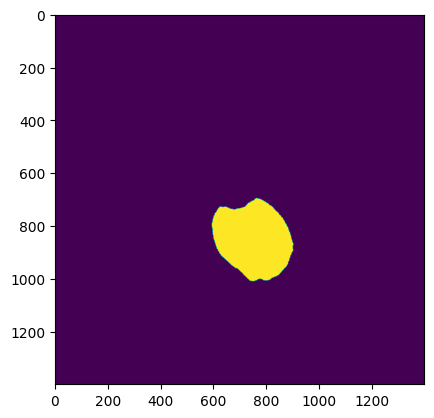

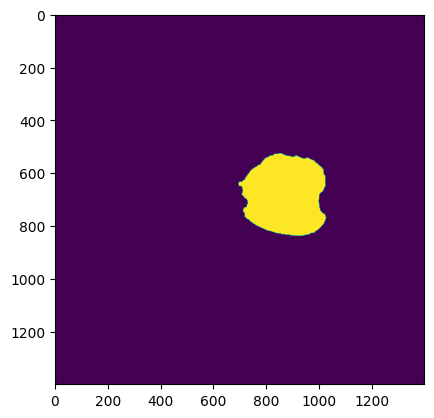

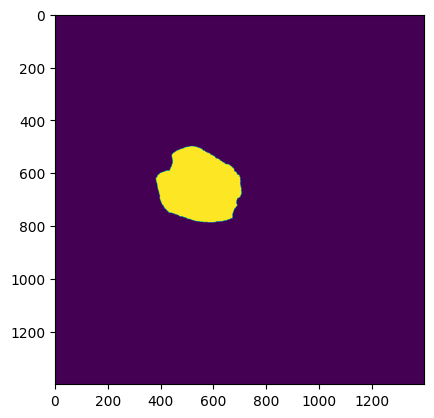

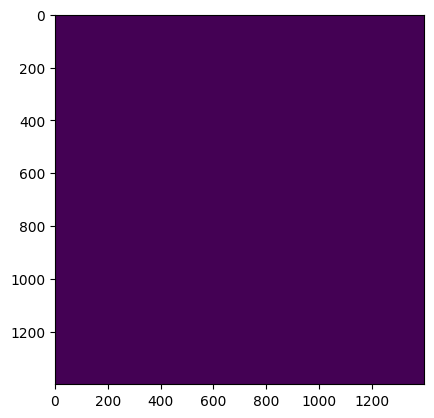

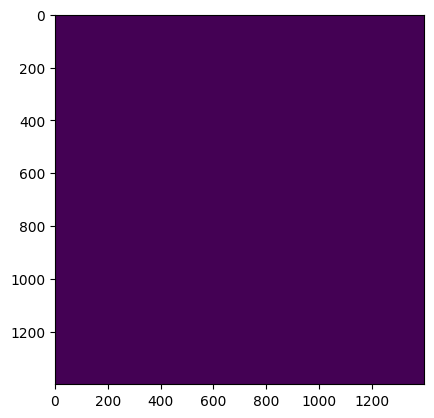

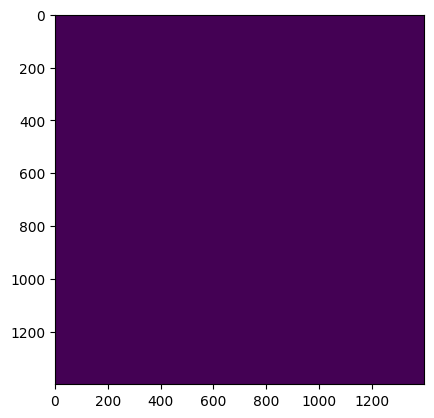

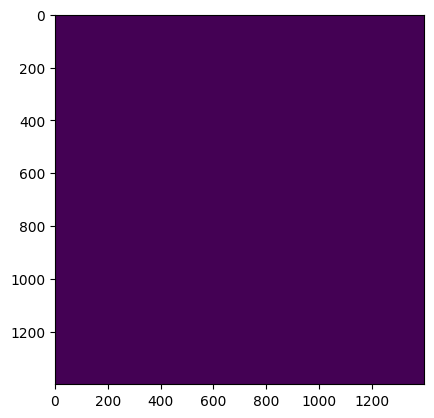

In [11]:
for i in range(mask_10c.shape[2]):
    show(mask_10c[:, :, i])